# Seaborn and Linear Regression

## Introduction

In this lesson, we're going to be looking at movie budget and revenue data. This dataset is perfect for trying out some new tools like scikit-learn to run a linear regression and seaborn, a popular data visualisation library built on top of Matplotlib. 

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

## Import Statements

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression


## Notebook Presentation

In [123]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Read the Data

In [124]:
data = pd.read_csv('cost_revenue_dirty.csv')

## Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [125]:
data.shape

(5391, 6)

In [126]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [127]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2412,4593,4/15/2005,House of D,"$2,000,000","$466,106","$388,532"
3005,4312,10/26/2007,Bella,"$3,300,000","$12,405,473","$8,093,373"
3611,3775,3/26/2010,Ca$h,"$7,000,000","$46,488","$46,488"
1377,4880,1/12/2000,Panic,"$1,000,000","$1,425,707","$779,137"
3308,4453,12/31/2008,Rejsen til Saturn,"$2,700,000","$5,377,665",$0


In [128]:
data.isna().values.any()

False

In [129]:
data.duplicated().values.any()

False

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [131]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross','USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "", regex=True)
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [132]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [133]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [134]:
data[data["USD_Production_Budget"] == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [135]:
data[data["USD_Production_Budget"] == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


### Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [136]:
len(data[data["USD_Domestic_Gross"] == 0])

512

In [137]:
data[data["USD_Domestic_Gross"] == 0].sort_values("USD_Production_Budget" ,ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


We see that there are 512 films in the dataset that had no revenue in the United States. However, the highest budget films with no revenue have a release date AFTER the date on which the dataset was compiled (May 1st, 2018).

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [138]:
len(data[data["USD_Worldwide_Gross"] == 0])

357

In [139]:
data[data["USD_Worldwide_Gross"] == 0].sort_values("USD_Production_Budget" ,ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Filtering on Multiple Conditions

So far, we've created subsets for our DataFrames based on a single condition. But what if we want to select our data based on more than one condition? For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)? 

How would we create a filter for these two conditions? One approach is to use the .loc[] property combined with the bitwise and & operator.

In [140]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(len(international_releases))
print(international_releases.head(10))

155
      Rank Release_Date                                  Movie_Title  \
71    4310   1956-02-16                                     Carousel   
1579  5087   2001-02-11                      Everything Put Together   
1744  3695   2001-12-31                                     The Hole   
2155  4236   2003-12-31                                      Nothing   
2203  2513   2004-03-31                                    The Touch   
2309  4623   2004-10-12                                 Freeze Frame   
2409  4747   2005-04-11         Wal-Mart: The High Cost of Low Price   
2578  2944   2005-12-31  Dungeons & Dragons: Wrath of the Dragon God   
2579  4531   2005-12-31                         Chicken Tikka Masala   
2751  1629   2006-09-22                                     Bandidas   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
71                  3380000                 3220                   0  
1579                 500000                 7890             

However, we're also checking if the domestic revenue was zero and the worldwide revenue was not zero. Because the bitwise operator takes precedence, we need to include parentheses () around the comparisons we'd like to prioritise.

This though is not the only technique we can use to make multiple comparisons.

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [141]:
data.query("USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0").head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
2309,4623,2004-10-12,Freeze Frame,2000000,105377,0
2409,4747,2005-04-11,Wal-Mart: The High Cost of Low Price,1500000,58692,0
2578,2944,2005-12-31,Dungeons & Dragons: Wrath of the Dragon God,15000000,909822,0
2579,4531,2005-12-31,Chicken Tikka Masala,2160000,37865,0
2751,1629,2006-09-22,Bandidas,35000000,19282590,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [142]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [143]:
unreleased_movies = data[data["Release_Date"] >= scrape_date]
len(unreleased_movies)

7

In [144]:
data_clean = data.drop(unreleased_movies.index)

data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11","31,038,476.84","88,970,947.21","41,289,131.75"
std,"1,555.79","40,440,041.47","168,536,755.89","66,055,507.64"
min,1.00,"1,100.00",0.00,0.00
25%,"1,351.75","5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50","17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25","40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [145]:
films_with_global_loss = data_clean.query("USD_Production_Budget > USD_Worldwide_Gross")

len(films_with_global_loss) / len(data_clean)

0.37277117384843983

## Seaborn for Data Viz: Bubble Charts

### Scatter Plot

To create a .scatterplot(), all we need to do is supply our DataFrame and the column names that we'd like to see on our axes.

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

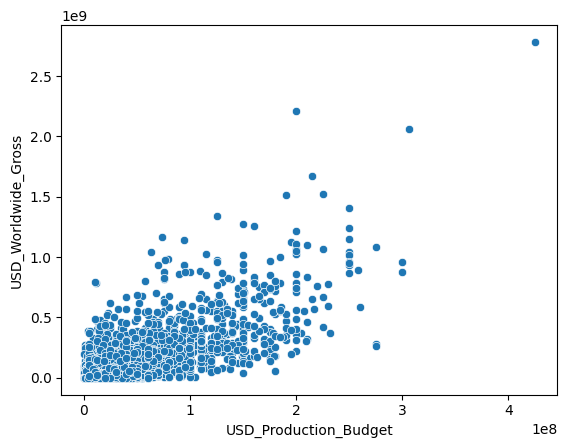

In [146]:
sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

That should look familiar. It is because Seaborn is built on top of Matplotlib, we can dive into the Matplotlib layer anytime to configure our chart. For example, we can increase the size of our figure. And to style our chart we can simply configure the Axes object that is returned from sns.scatterplot().

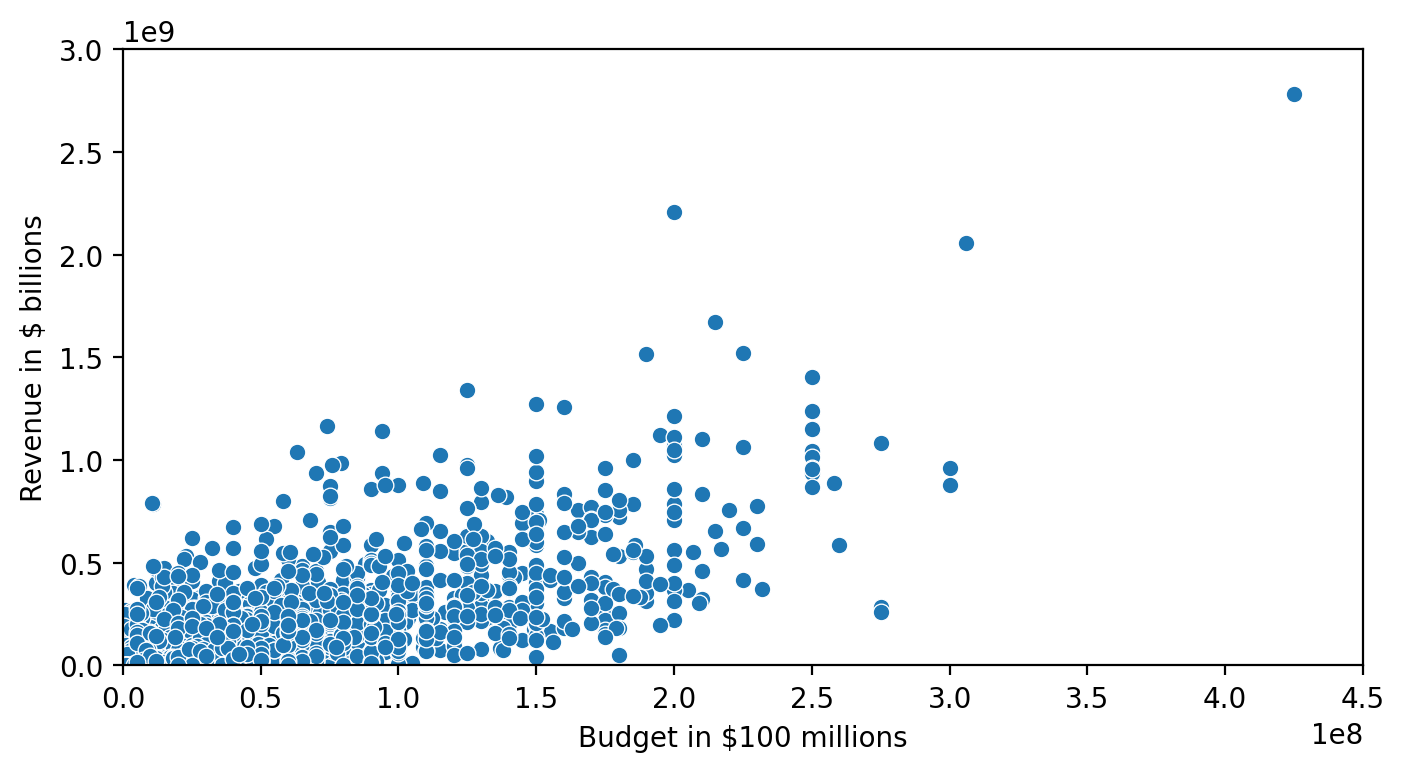

In [147]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

### From Scatter Plot to Bubble Chart

But the reason we're using Seaborn is because of the hue and size parameters that make it very easy to create a bubble chart. These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.

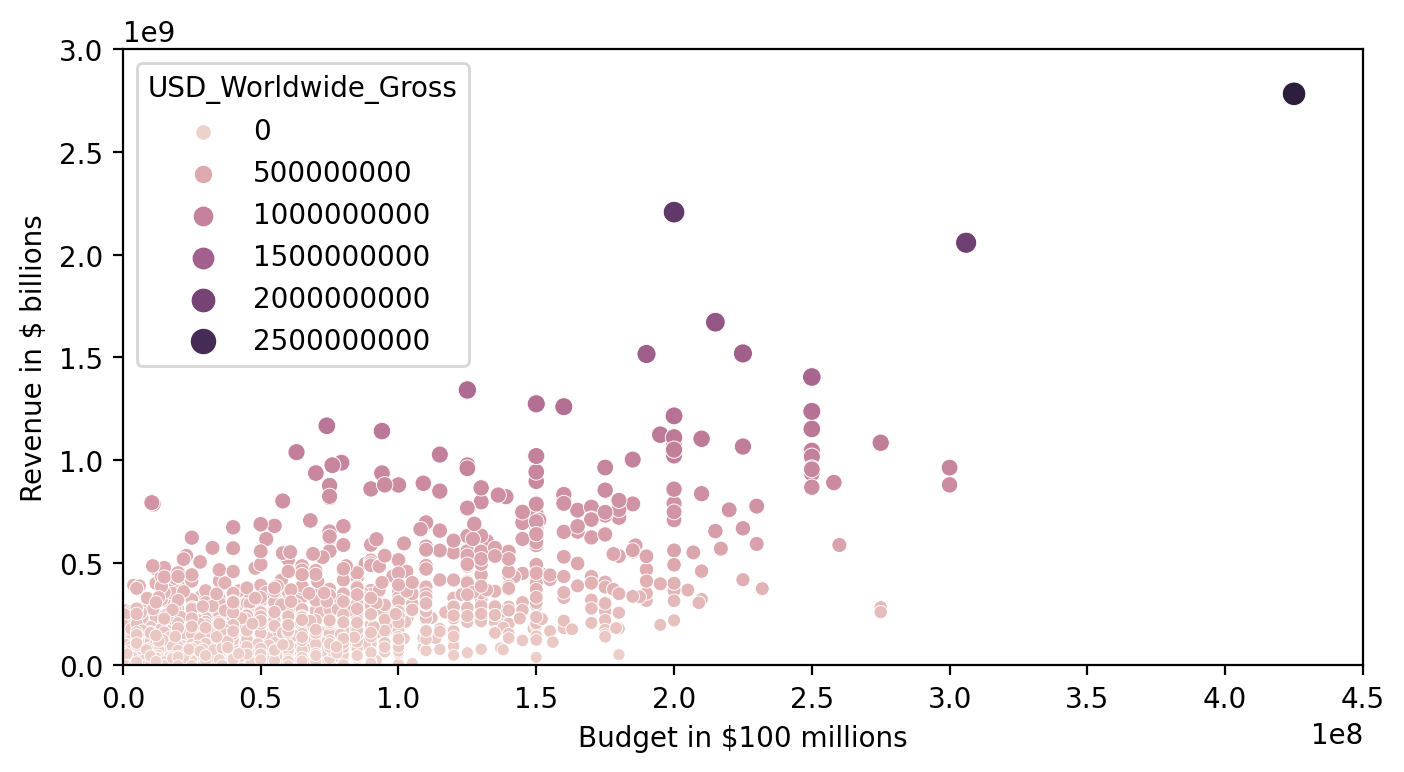

In [148]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

Now our higher grossing movies are bigger and darker on our chart. That's super handy. But Seaborn offers a number of convenient styling options as well.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's with keyword. We've seen with used already when it comes to opening files in previous lessons.

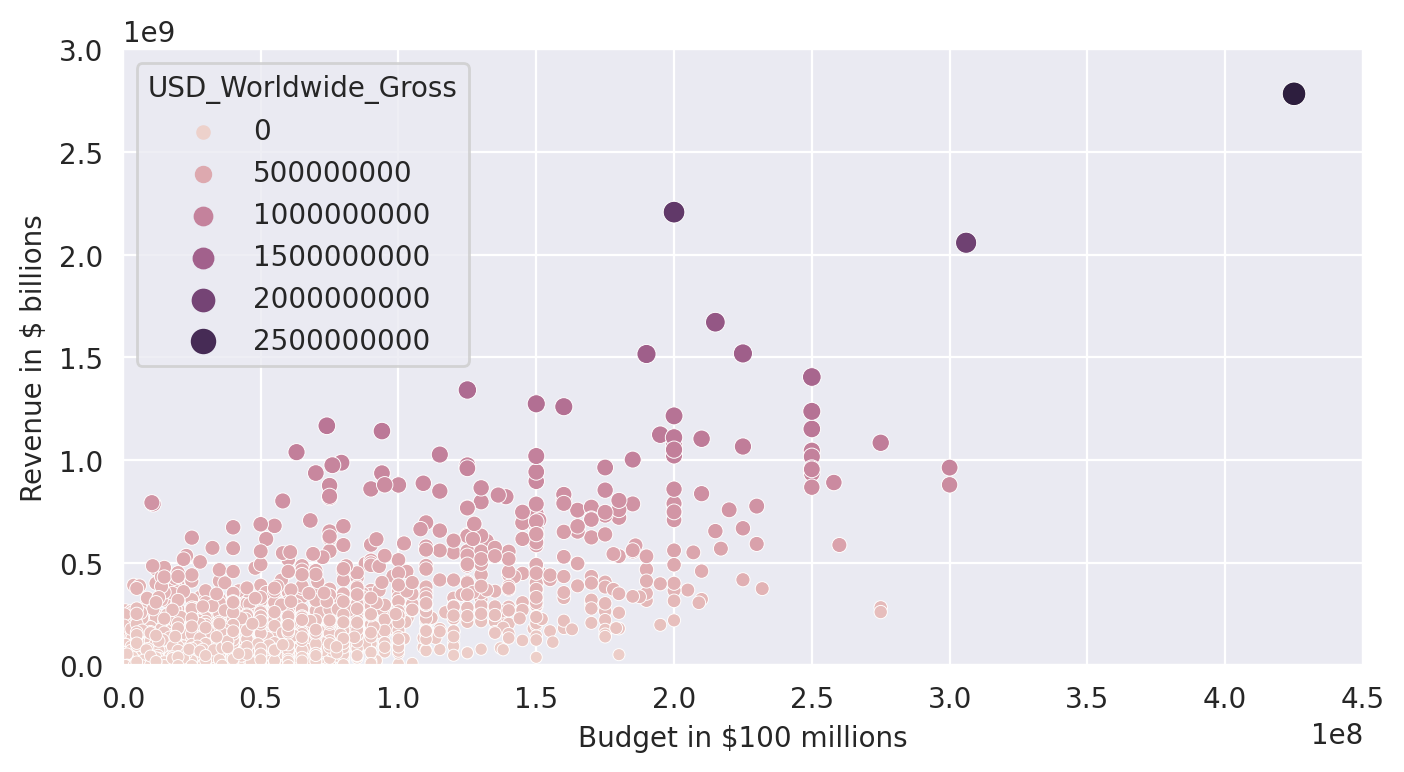

In [149]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

In addition to 'darkgrid', Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out 'whitegrid', 'dark',  or 'ticks' for example.

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:  

Now that you've seen how to create a beautiful bubble chart in Seaborn, it's time to create your own. Can you write the code to replicate this chart? Notice how we are actually representing THREE dimensions in this chart: the budget, the release date, and the worldwide revenue. This is what makes bubble charts so awesomely informative.

<img src=https://i.imgur.com/8fUn9T6.png>

All we needed to do is change a few arguments:

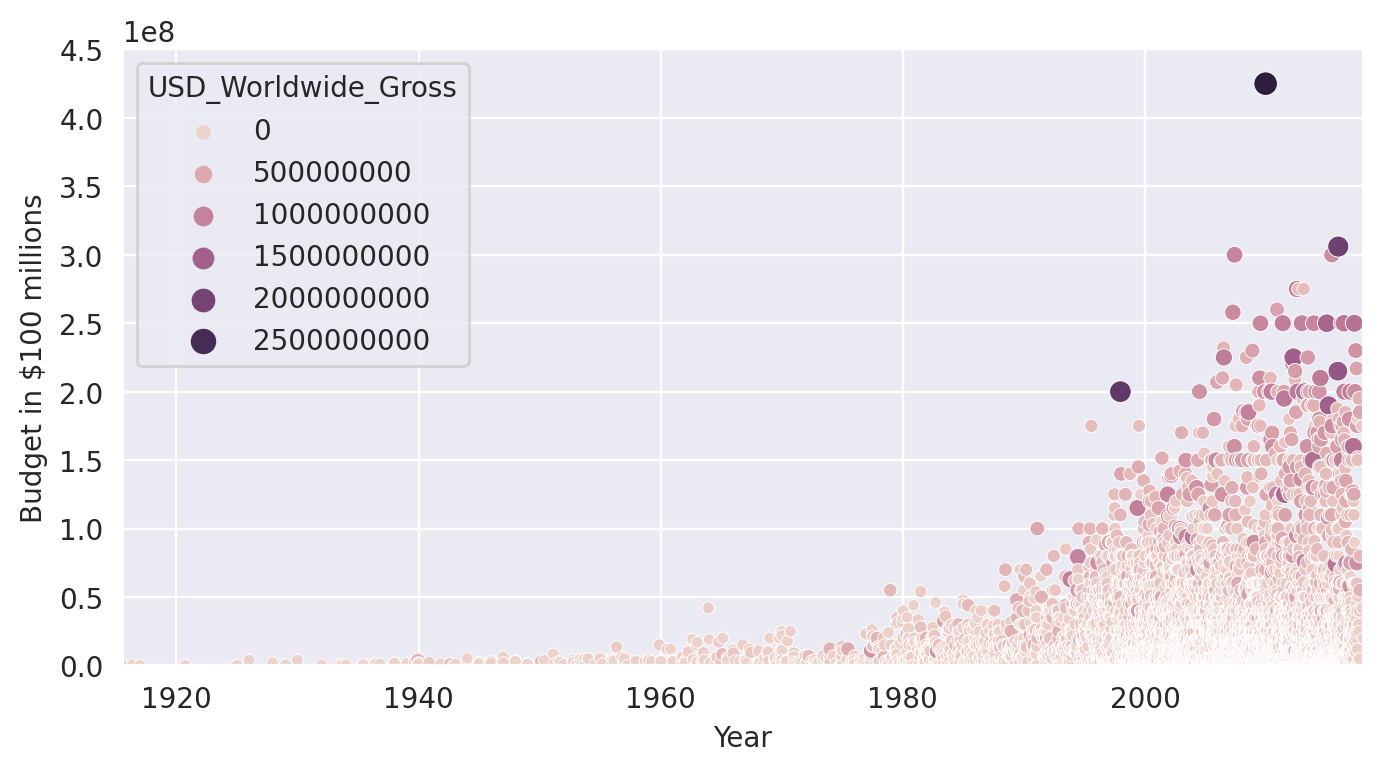

In [150]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

## Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650>  

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.  
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [151]:
data_clean["Decade"] = pd.DatetimeIndex(data_clean["Release_Date"]).year // 10 * 10

data_clean.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
513,2795,1988-09-12,Twins,15000000,216600000,111936388,1980
2511,3663,2005-09-23,Dear Wendy,8000000,446438,23106,2000
194,2961,1974-12-17,Towering Inferno,14000000,139700000,116000000,1970
793,1200,1995-07-14,The Indian in the Cupboard,45000000,35627222,35627222,1990
4909,1544,2015-05-22,Poltergeist,35000000,95825125,47425125,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [152]:
old_films = data_clean.query("Release_Date < 1970")

print(len(old_films))
old_films.tail()

153


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960
152,4195,1969-12-19,Topaz,4000000,6000000,6000000,1960


In [153]:
new_films = data_clean.query("Release_Date > 1970")

print(len(new_films))
new_films.head()

5225


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
159,5027,1970-03-26,Woodstock,600000,34505110,34505110,1970
160,4259,1970-05-13,The Ballad of Cable Hogue,3716946,5000000,3500000,1970
161,4349,1970-05-26,Beneath the Planet of the Apes,3000000,17489009,17489009,1970
162,2598,1970-06-24,Catch-22,18000000,24911670,24911670,1970
163,2076,1970-09-23,"Tora, Tora, Tora",25000000,29548291,29548291,1970


In [154]:
old_films.sort_values("USD_Production_Budget", ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


## Seaborn Regression Plots

Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the .regplot() function.

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

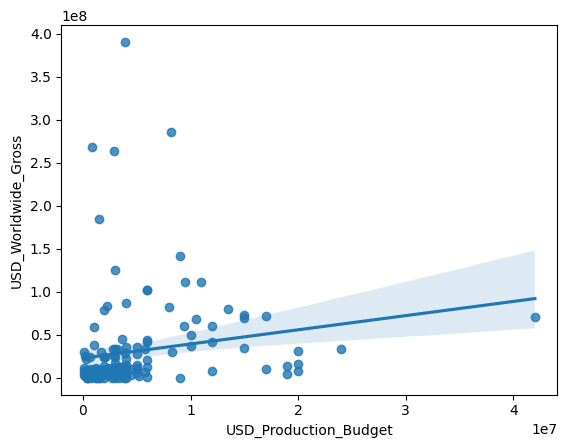

In [155]:
sns.regplot(data=old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross')

To style the chart further, we can once again, drop into the Matplotlib layer and supply keyword arguments as dictionaries. We can customise the scatter plot (e.g., by changing the transparency of the dots) and the regression line itself (e.g., by changing the colour).

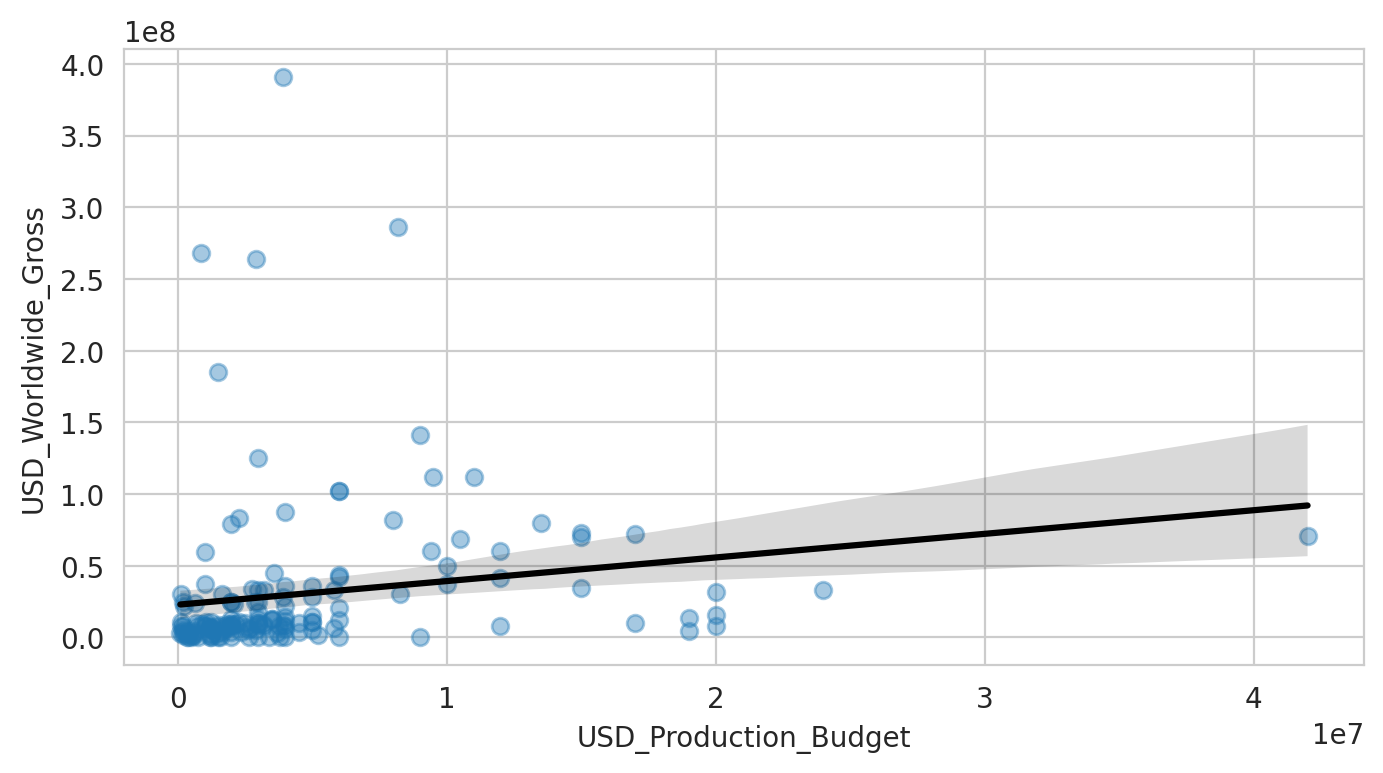

In [156]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ 100 millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

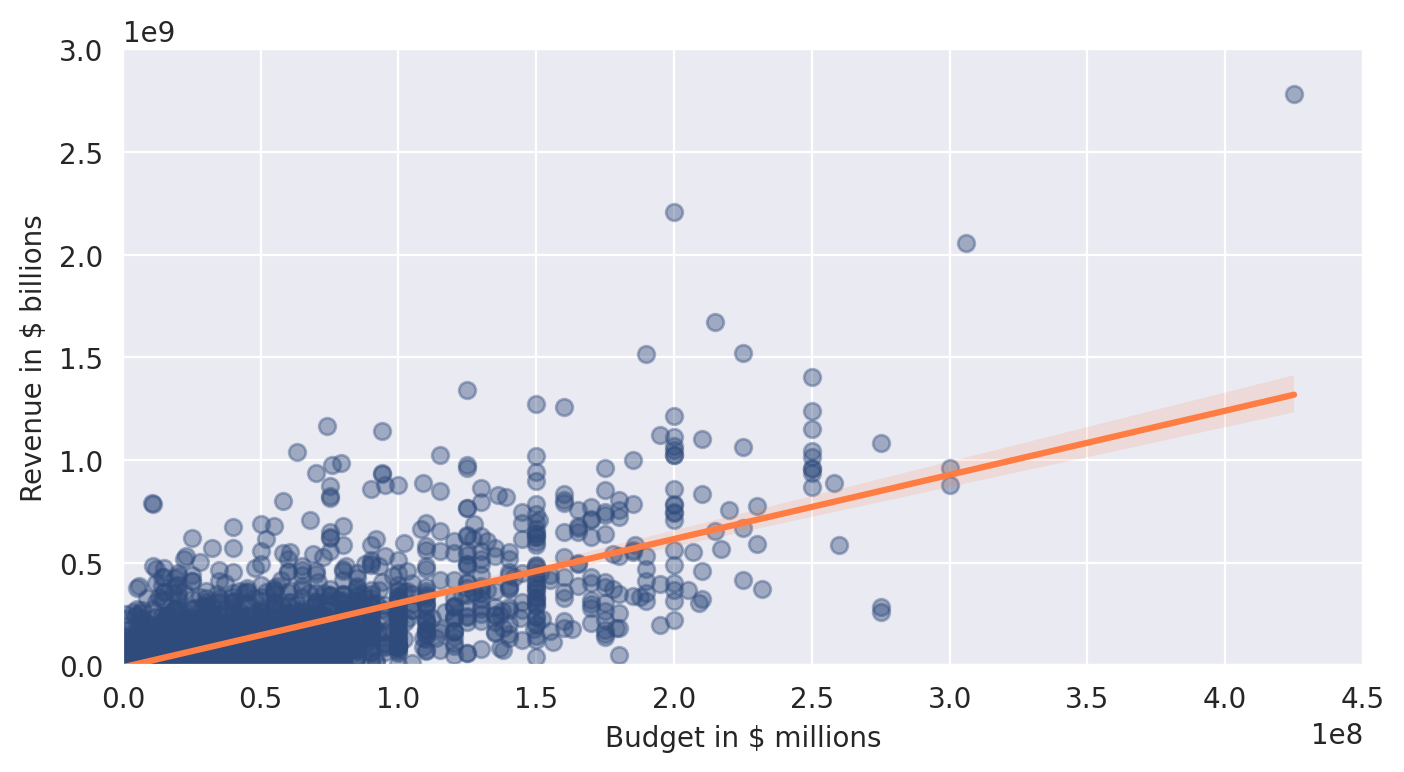

In [157]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4, 'color': '#2f4b7c'},
            line_kws = {'color': '#ff7c43'})
  
  ax.set(xlim=(0, 450000000),
         ylim=(0, 3000000000),
         xlabel="Budget in $ millions",
         ylabel="Revenue in $ billions"
         )

## Run Your Own Regression with scikit-learn

Let's dive into our linear regression model a bit more. We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues. The regression line has the following structure:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

So how can we find out what our model's estimates are for theta-one and theta-zero? And how can we run our own regression, regardless of whether we want to visualise it on a chart? For that, we can use scikit-learn.

Now we can run a LinearRegression. First, let's create a LinearRegression object that will do the work for us.

regression = LinearRegression()
Now we should specify our features and our targets (i.e., our response variable). You will often see the features named capital X and the target named lower case y.

Our LinearRegression does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget), so we've created some new DataFrames here.

Now it's time to get to work and run the calculations:

In [161]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

LinearRegression()

That's it. Now we can look at the values of theta-one and theta-zero from the equation above.

In [162]:
# Theta Zero
regression.intercept_

array([-8653668.6979281])

In [163]:
# Theta One
regression.coef_

array([[3.12280986]])

Both intercept_ and coef_ are simply attributes of the LinearRegression object. Don't worry about the underscores at the end, these are simply part of the attribute names that the scikit-learn developers have chosen.

How do we interpret the y-intercept? Literally, means that if a movie budget is $0, the estimated movie revenue is -$8.65 million. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

**R-Squared: Goodness of Fit**

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

In [164]:
# R-squared
regression.score(X, y)

0.5577186673054811

We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [165]:
regression = LinearRegression()

X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

regression.fit(X, y)

LinearRegression()

In [166]:
regression.intercept_

array([22821538.63508039])

In [167]:
regression.coef_

array([[1.64771314]])

In [168]:
regression.score(X, y)

0.02937258620576877

**Solution: A bad fit**

Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6, but the r-squared is very low.

## Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

For a $350 million budget film, our model predicts a worldwide revenue of around $600 million! You can calculate this as follows:

In [169]:
22821538 + 1.64771314 * 350000000

599521137.0

Or, using the regression object, you could also work it out like this:

In [170]:
budget = 350000000
rev_estimate = regression.intercept_[0] + (regression.coef_[0]*budget)
rev_estimate = round(rev_estimate[0], -6)
print(f"The estimated revenue for a $350M film is around ${rev_estimate/1000000:.0f}M")

The estimated revenue for a $350M film is around $600M


(The colon : and dot . in a print statement is quite handy for controlling the number of digits you'd like to show up in the output)

## Learning Points & Summary

Today was a pretty packed lesson where we introduced a lot of new concepts. In this lesson we looked at how to:

- Use nested loops to remove unwanted characters from multiple columns

- Filter Pandas DataFrames based on multiple conditions using both .loc[] and .query()

- Create bubble charts using the Seaborn Library

- Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

- Use floor division (i.e., integer division) to convert years to decades

- Use Seaborn to superimpose a linear regressions over our data

- Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

- Run regressions with scikit-learn and calculate the coefficients.